### Q1(a). 

$ y = ax^3 + bx^2 + cx + d$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [54]:
x = [0.0000, 0.5236, 1.0472, 1.5708, 2.0944, 2.6180, 3.1416]
t = [2.7600, -2.3902, 1.3800, 0.0000, -1.3800, 2.3902, -2.7600]

length = len(x)
X = np.array(x).reshape([length,1])
Y = np.array(t)

poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, Y)
lin3 = linear_model.LinearRegression() 
fit3 = lin3.fit(X_poly, Y)
print('Coefficients', lin3.coef_)

Coefficients [ 0.         -8.66626044  6.87598812 -1.45912659]


In [55]:
y_hat1=fit3.predict(X_poly)

In [4]:
from sklearn.metrics import r2_score
r_1 = r2_score(t, y_hat1, multioutput='raw_values')
print("The r^2 of first function is %.4f" % r_1)

The r^2 of first function is 0.4226


### Q1(b). 

$ y = ax^(10) + bx^9 + ... + jx + k$

In [6]:
poly = PolynomialFeatures(degree = 10) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, Y) 
lin10 = linear_model.LinearRegression() 
fit10 = lin10.fit(X_poly, Y)
print('Coefficients', lin10.coef_)
y_hat2=fit10.predict(X_poly)

Coefficients [-2.52299959e-10 -1.67589429e+01  6.87097977e+00  1.12807039e+01
  5.39829466e+00 -3.43190246e+00 -7.73596181e+00 -2.16123650e+00
  7.54840059e+00 -3.21441950e+00  4.09132735e-01]


In [7]:
from sklearn.metrics import r2_score
r_1 = r2_score(t, y_hat2, multioutput='raw_values')
print("The r^2 of first function is %.4f" % r_1)

The r^2 of first function is 1.0000


### Q1(c).

$ y = a * cos(5x)$

In [8]:
from scipy import optimize  
from scipy.optimize import curve_fit

x = np.array(x)
t = np.array(t)

# define the target function
def func(x,a):
    return a*np.cos(5*x)
 
# run the optimization
fita=optimize.curve_fit(func,x,t)
fita

(array([2.75999793]), array([[3.52884938e-10]]))

In [9]:
y_hat=2.75999793*np.cos(x*5)

In [10]:
from sklearn.metrics import r2_score
r_1 = r2_score(t, y_hat, multioutput='raw_values')
print("The r^2 of first function is %.4f" % r_1)

The r^2 of first function is 1.0000


### Q2(a)

In [45]:
import pandas as pd
# from pandas import Series, DataFrame
training = pd.read_csv('hw2q2Training.csv')
test = pd.read_csv('hw2q2Validation.csv')

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Perceptron
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
 
x_train = np.array(training.iloc[:,0]).reshape(-1, 1)
y_train = np.array(training.iloc[:,1]).reshape(-1, 1)

x_test = np.array(test.iloc[:,0]).reshape(-1, 1)
y_test = np.array(test.iloc[:,1]).reshape(-1, 1)

rmses = []
degrees = np.arange(1, 15)
min_rmse, min_deg,score = 1e10, 0 ,0

In [52]:
for deg in degrees:
    
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)
 
    # polynomial fitting
    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)

    x_test_poly = poly.fit_transform(x_test)
    y_test_pred = poly_reg.predict(x_test_poly)

    # calculate the mean squared error
    poly_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    rmses.append(poly_rmse)
    
    # calculate r2
    r2score = r2_score(y_test, y_test_pred)

    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg
        score = r2score

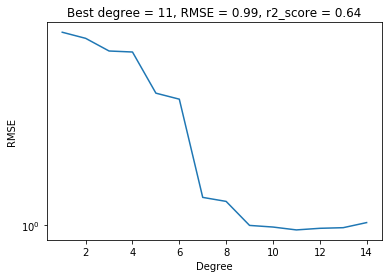

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.set_title('Best degree = %s, RMSE = %.2f, r2_score = %.2f' %(min_deg, min_rmse,score))  
plt.show()

According to the plot above shows, order 11 would be selected.

### Q2(b)

In [35]:
poly5 = PolynomialFeatures(degree=5)
x_train_poly5 = poly5.fit_transform(x_train)
 
# polynomial fitting
poly_reg5 = LinearRegression()
poly_reg5.fit(x_train_poly5, y_train)
x_test_poly5 = poly5.fit_transform(x_test)
y_test_pred5 = poly_reg5.predict(x_test_poly5)
SSE = 0
for i in range(0 , len(y_test_pred5)):
    SE = (y_test[i]-y_test_pred5[i])**2
    SSE = SSE + SE
SSE

array([196.39106792])

At order 5, the SSE on the validation set is 196.39

### Q2(c)

In prac 2, we used MSE to select the best order, but now we use RMSE to determine the order.

### Q3


For N = 15 data points, the curves of all orders M in the table 1.1 cannot fit the data. For N = 100, M = 0 and 1 may still not fit the data well. But when M = 6 and 9, the curve would fit the data better because the increase of the data reduces the over-fitting problem.

### Q4

In [50]:
class NormalPdf:
    def __init__(self, mu, std):
        self.mu = mu
        self.std = std

    def __call__(self,x):
        diff = (x - self.mu)*(x - self.mu)
        return 1/(np.sqrt(2*np.pi)*self.std) * np.exp(-(diff/(2*self.std*self.std)))

def generate_norm(data, labels, label):
    c = data[labels==label]
    mean = np.mean(c)
    std = np.std(c)
    return NormalPdf(mean, std)

In [51]:
def PPC(data, labels):
    uniques = np.unique(labels)
    norm = []
    postnum = []
    denom = 0
    for i in range(len(uniques)):
        norm.append(generate_norm(data, labels, uniques[i]))
        x = np.linspace(np.min(data)-4, np.max(data)+4, 500)
        plt.plot(x, norm[i](x))
        plt.xlabel('x')
        plt.ylabel(r'$p(x|C_i)$')
        #assume equal priors
        postnum.append(norm[i](x)*(1/len(uniques)))
        denom = denom + postnum[i]
    post = []
    for i in range(len(uniques)):
        post.append(postnum[i]/denom)
        plt.figure()
        plt.plot(x, post[i])
        plt.xlabel('x')
        plt.ylabel(r'$P(C_i|x)$')
        plt.show()

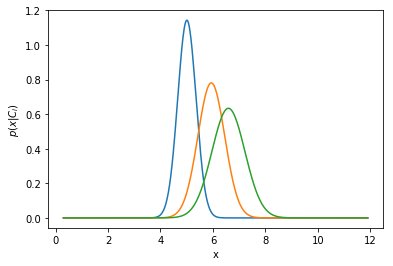

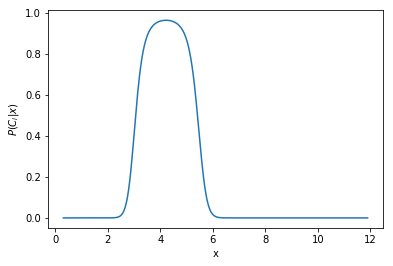

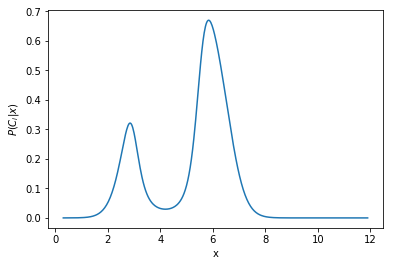

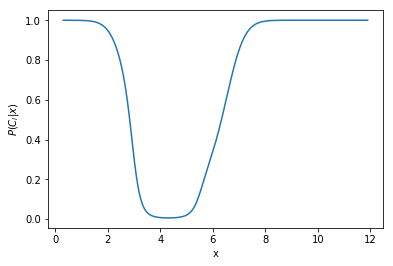

In [16]:
import pandas
df= pandas.read_csv('iris.txt', header=None)
data = np.array(df[0])
labels = np.array(df[4])
# generate the plots using our function
PPC(data,labels)

### Q5(a)

In [17]:
from sympy import *
import math


k = Symbol('k')
l = Symbol('l')  
n = 1000
AIC = 20003.2189 #AIC = 2k - 2ln(L)
BIC = 69080.7717 #BIC = k*ln(n) - 2ln(L)

# define ln(L) = l
# build simultaneous equations to calculate k and l

a = solve([(2*k-2*l)-AIC,-2*l+math.log(n)*k- BIC],[k,l])

print(a) 

{k: 10000.0000020740, l: -1.60944792601721}


In [20]:
L = math.exp(a[l])
L

0.19999799729340578

The maximum likelihood the likelihood is 0.2000, and there are 10000 parameters in the model.

### Q5(b)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


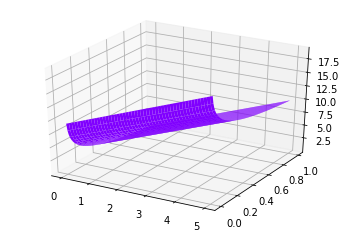

In [27]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax3 = plt.axes(projection='3d')

#define the suitable range of k and L of our own
X = np.arange(0, 5, 0.01) #a[k] = 10000
Y = np.arange(0, 1, 0.01) #L = 0.1999
X, Y = np.meshgrid(X, Y)
Z = 2*X - 2*np.log(Y)

ax3.plot_surface(X,Y,Z,cmap='rainbow')
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


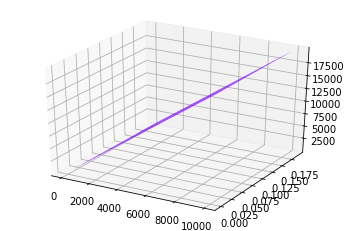

In [34]:
# if we use the range in question (a)
fig = plt.figure()
ax = plt.axes(projection='3d')

X1 = np.arange(0, 10000, 5) #a[k] = 10000
Y1 = np.arange(0, 0.2, 0.01) #L = 0.2000
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = 2*X1 - 2*np.log(Y1)

ax.plot_surface(X1,Y1,Z1,cmap='rainbow')
plt.show()